In [1]:
import os
import cv2

import os
import pandas as pd
import numpy as np
import PIL
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.misc import imsave
from imageio import imwrite
from numpy.random import randint
from keras.models import load_model,save_model

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
def getCircleCoord(topx,topy,bottomx,bottomy):
    """
    Generates a random circle within a block given the coordinates of the block.
    
    The block is defined by two points, top-left and bottom-right
    
    Returns the centre coordinate, radius of the circle as well as the top-left corner coordinate of the bounding box for the cirle  
    """
    
    #Randomly select the top-left corner of the bounding box for a cirle 
    x,y = randint(topx,bottomx-4), randint(topy,bottomy-4)
    
    m = max(x,y)
    
    #Width is radius times 2
    width = bottomx - topx
    
    radius = int(randint(2,max(3,(width-m)/2.0)))
    center = (x+radius,y+radius)
  

    return(center,radius,(x,y))
    
    
    

(3, 8)
(18, 20)


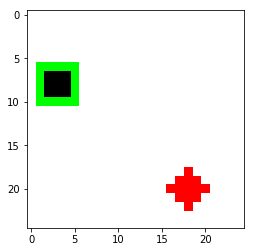

In [53]:
"""
Here for an image size of 25x25, we are splitting the image into 2 vertical regions by splitting the 
overall image by half in the x axis
"""

img_size = (25,25,3)

img = np.ones(img_size)
img[:,:,:]=1

#Obtaining and plotting the two circles
circ1 = getCircleCoord(0,0,12,25)
circ2 = getCircleCoord(12,0,25,25)

cv2.circle(img,circ1[0],circ1[1],(0,0,0),-1)
cv2.circle(img,circ2[0],circ2[1],(50,0,0),-1)

#putting a bounding box around the first circle
cv2.rectangle(img,circ1[2],(circ1[2][0]+2*circ1[1],circ1[2][1]+2*circ1[1]),(0,100,0),1)


print(circ1[0])
print(circ2[0])



plt.imshow(img)




In [94]:
def createImage(img_size,display=False):
    

    img = np.ones(img_size)
    img[:,:,:]=1

    circ1 = getCircleCoord(0,0,12,25)
    circ2 = getCircleCoord(12,0,25,25)

    # If you use any other color than black to mark the circles, then the background goes black.
    #Something to do with the range of values getting truncated.
    cv2.circle(img,circ1[0],circ1[1],(0,0,0),-1)
    cv2.circle(img,circ2[0],circ2[1],(0,0,0),-1)


    if display==True:
        plt.imshow(img)
        print([circ1[2][0],circ1[2][1],circ1[1],circ1[1], circ2[2][0],circ2[2][1],circ2[1],circ2[1]])
        print(circ1[0], circ2[0])

        
    return(img,[circ1[2][0],circ1[2][1],circ1[1]*2,circ1[1]*2, circ2[2][0],circ2[2][1],circ2[1]*2,circ2[1]*2])
    

In [96]:
data = pd.DataFrame(columns=['key','x1','y1','width1','height1','x2','y2','width2','height2'])

img_size=(25,25,3)
size='25x25'
os.chdir('/home/rsk/Documents/Projects/YOLO/Combined/'+size+'/')

numImg=8000


for i in range(numImg):
    key = i
    
    img,[x1,y1,width1,height1,x2,y2,width2,height2] = createImage(img_size)
#     img = img.astype(np.uint8)
    imwrite(str(key)+'.png',img)
    
    data = data.append({'key':key,'x1':x1,'y1':y1,'width1':width1,'height1':height1,
                       'x2':x2-12,'y2':y2,'width2':width2,'height2':height2}, ignore_index=True)
    

data.to_csv(size+'_truth.csv',index=False,index_label=False)

    
    
    

In [6]:
# Sanity Test

from keras.preprocessing import image

def read_img(filepath, size):
    img = image.load_img((filepath), target_size=size)
    img = image.img_to_array(img,data_format='channels_last')
    return img


img = read_img('/home/rsk/Documents/Projects/YOLO/Combined/25x25/0.png',(25,25,3))

In [10]:

truth = pd.read_csv('/home/rsk/Documents/Projects/YOLO/Combined/25x25/25x25_truth.csv')
y = np.array(truth)
y = np.array(y[:,1:])
y = np.array(y)



In [12]:
y[0]

array([ 1, 12,  4,  4,  5,  7,  4,  4])

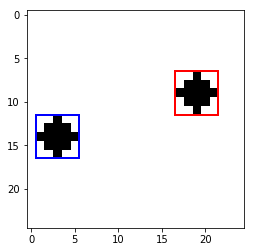

In [16]:
from matplotlib.patches import Rectangle
fig,ax = plt.subplots(1)
ax.imshow(img)

   
rect1 = Rectangle((y[0][0]-0.5,y[0][1]-0.5),y[0][3]+1, y[0][2]+1,fill=False,edgecolor='blue',
                     linewidth=2)
rect2 = Rectangle((y[0][4]+12-0.5,y[0][5]-0.5),y[0][7]+1, y[0][6]+1,fill=False,edgecolor='red',
                     linewidth=2)

ax.add_patch(rect1)
ax.add_patch(rect2)

plt.show()